In [1]:
import sys
sys.path.append("../")

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
calc_dataset = pd.read_csv("../dataset/csv/calc_case_description_train_set.csv")
dicom_dataset = pd.read_csv("../dataset/csv/dicom_info.csv")

In [7]:
calc_dataset

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,P_02566,2,RIGHT,MLO,1,calcification,AMORPHOUS-PLEOMORPHIC,SEGMENTAL,5,MALIGNANT,5,Calc-Training_P_02566_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_02566_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_02566_RIGHT_MLO_1/1.3.6.1.4.1....
1542,P_02572,2,LEFT,CC,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,Calc-Training_P_02572_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_02572_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_02572_LEFT_CC_1/1.3.6.1.4.1.95...
1543,P_02572,2,LEFT,MLO,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,Calc-Training_P_02572_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_02572_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_02572_LEFT_MLO_1/1.3.6.1.4.1.9...
1544,P_02584,1,LEFT,CC,1,calcification,PLEOMORPHIC,SEGMENTAL,0,BENIGN,4,Calc-Training_P_02584_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...


In [19]:
dicom_dataset[["PatientID","SeriesDescription"]]

,PatientID,SeriesDescription
0,Mass-Training_P_01265_RIGHT_MLO_1,cropped images
1,Mass-Training_P_01754_RIGHT_CC,full mammogram images
2,Calc-Training_P_00232_RIGHT_CC,full mammogram images
3,Calc-Test_P_00562_LEFT_CC_2,cropped images
4,P_00562_LEFT_CC_2.dcm,NaN
...,...,...
10232,Calc-Training_P_01864_RIGHT_CC_2,ROI mask images
10233,Mass-Test_P_00979_LEFT_MLO,full mammogram images
10234,Mass-Training_P_01461_RIGHT_MLO,full mammogram images
10235,Mass-Training_P_00314_RIGHT_MLO_1,ROI mask images


In [30]:
dicom_dataset[["image_path", "PatientID"]][dicom_dataset["SeriesDescription"] == "cropped images"]

,image_path,PatientID
0,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,Mass-Training_P_01265_RIGHT_MLO_1
3,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,Calc-Test_P_00562_LEFT_CC_2
6,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...,Calc-Training_P_00181_RIGHT_CC_1
7,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...,Calc-Training_P_01015_LEFT_CC_1
10,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...,Calc-Training_P_01497_LEFT_CC_1
...,...,...
10225,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.374221...,Calc-Training_P_00448_LEFT_MLO_1
10227,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.195242...,Mass-Training_P_01559_RIGHT_MLO_1
10229,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.263713...,Mass-Training_P_00731_RIGHT_CC_1
10231,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.627982...,Calc-Training_P_01864_RIGHT_CC_2


In [61]:
calc_dataset[calc_dataset["patient_id"] == "P_01497"]

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
1184,P_01497,4,LEFT,CC,1,calcification,PUNCTATE-AMORPHOUS,REGIONAL,4,BENIGN,3,Calc-Training_P_01497_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_01497_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_01497_LEFT_CC_1/1.3.6.1.4.1.95...
1185,P_01497,4,LEFT,MLO,1,calcification,PUNCTATE-AMORPHOUS,REGIONAL,4,BENIGN,3,Calc-Training_P_01497_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_01497_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_01497_LEFT_MLO_1/1.3.6.1.4.1.9...
1186,P_01497,4,RIGHT,MLO,1,calcification,PUNCTATE-AMORPHOUS,REGIONAL,4,BENIGN,3,Calc-Training_P_01497_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_01497_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_01497_RIGHT_MLO_1/1.3.6.1.4.1....


In [70]:
x = dicom_dataset[["image_path", "SeriesDescription"]][dicom_dataset["PatientID"] == "Calc-Training_P_01497_LEFT_CC"]

In [71]:
x.values

array([['CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.350546038712624038408433082083902639722/1-106.jpg',
        'full mammogram images']], dtype=object)

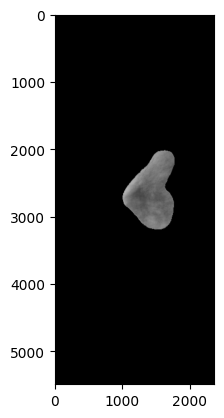

In [75]:
im = cv2.imread('../dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.350546038712624038408433082083902639722/1-106.jpg')
plt.imshow(im*roi)

In [ ]:
im

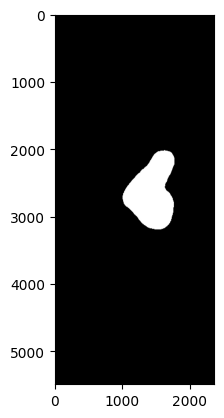

In [74]:
roi = cv2.imread('../dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.411833492612373627114350673042828631265/2-281.jpg')
plt.imshow(roi)

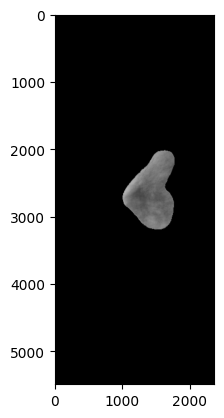

In [76]:
im = cv2.imread('../dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.350546038712624038408433082083902639722/1-106.jpg')
plt.imshow(im*roi)

In [68]:
roi.shape

(1217, 809, 3)